# PU learning techniques applied to the `Banknote Authentication Data Set` from the *UC Irvine Machine Learning Repository*
---
URL: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [61]:
!pip install --user pulearn

In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for random selections, mainly
import matplotlib.pyplot as plt        # for plotting
import plotly.io as pio
pio.renderers.default = "png"
%matplotlib inline                  
plt.rcParams['figure.figsize'] = 7,7   # graph dimensions
plt.rcParams['font.size'] = 14         # graph font size
pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\matthewkent.regalado\Anaconda3\envs\project-env\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\matthewkent.regalado\Anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\matthewkent.regalado\Anaconda3\envs\project-env\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Exploratory Data Analysis
---

In [2]:
df_raw = pd.read_csv(
    'data/bank_auth/data_banknote_authentication.txt',
    # specify col names to use since the txt file doesn't have a header row
    # col names were acquired from the source
    names=[
        'variance',
        'skewness',
        'curtosis',
        'entropy',
        'target'
    ]
)

val_cts = df_raw['target'].value_counts()

print(display(df_raw.head()))
print(f'\nClasses:\n{val_cts}\n')
print(df_raw.info())
print(f'\nHas NULL values: {df_raw.isnull().values.any()}\n')

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


None

Classes:
0    762
1    610
Name: target, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Has NULL values: False



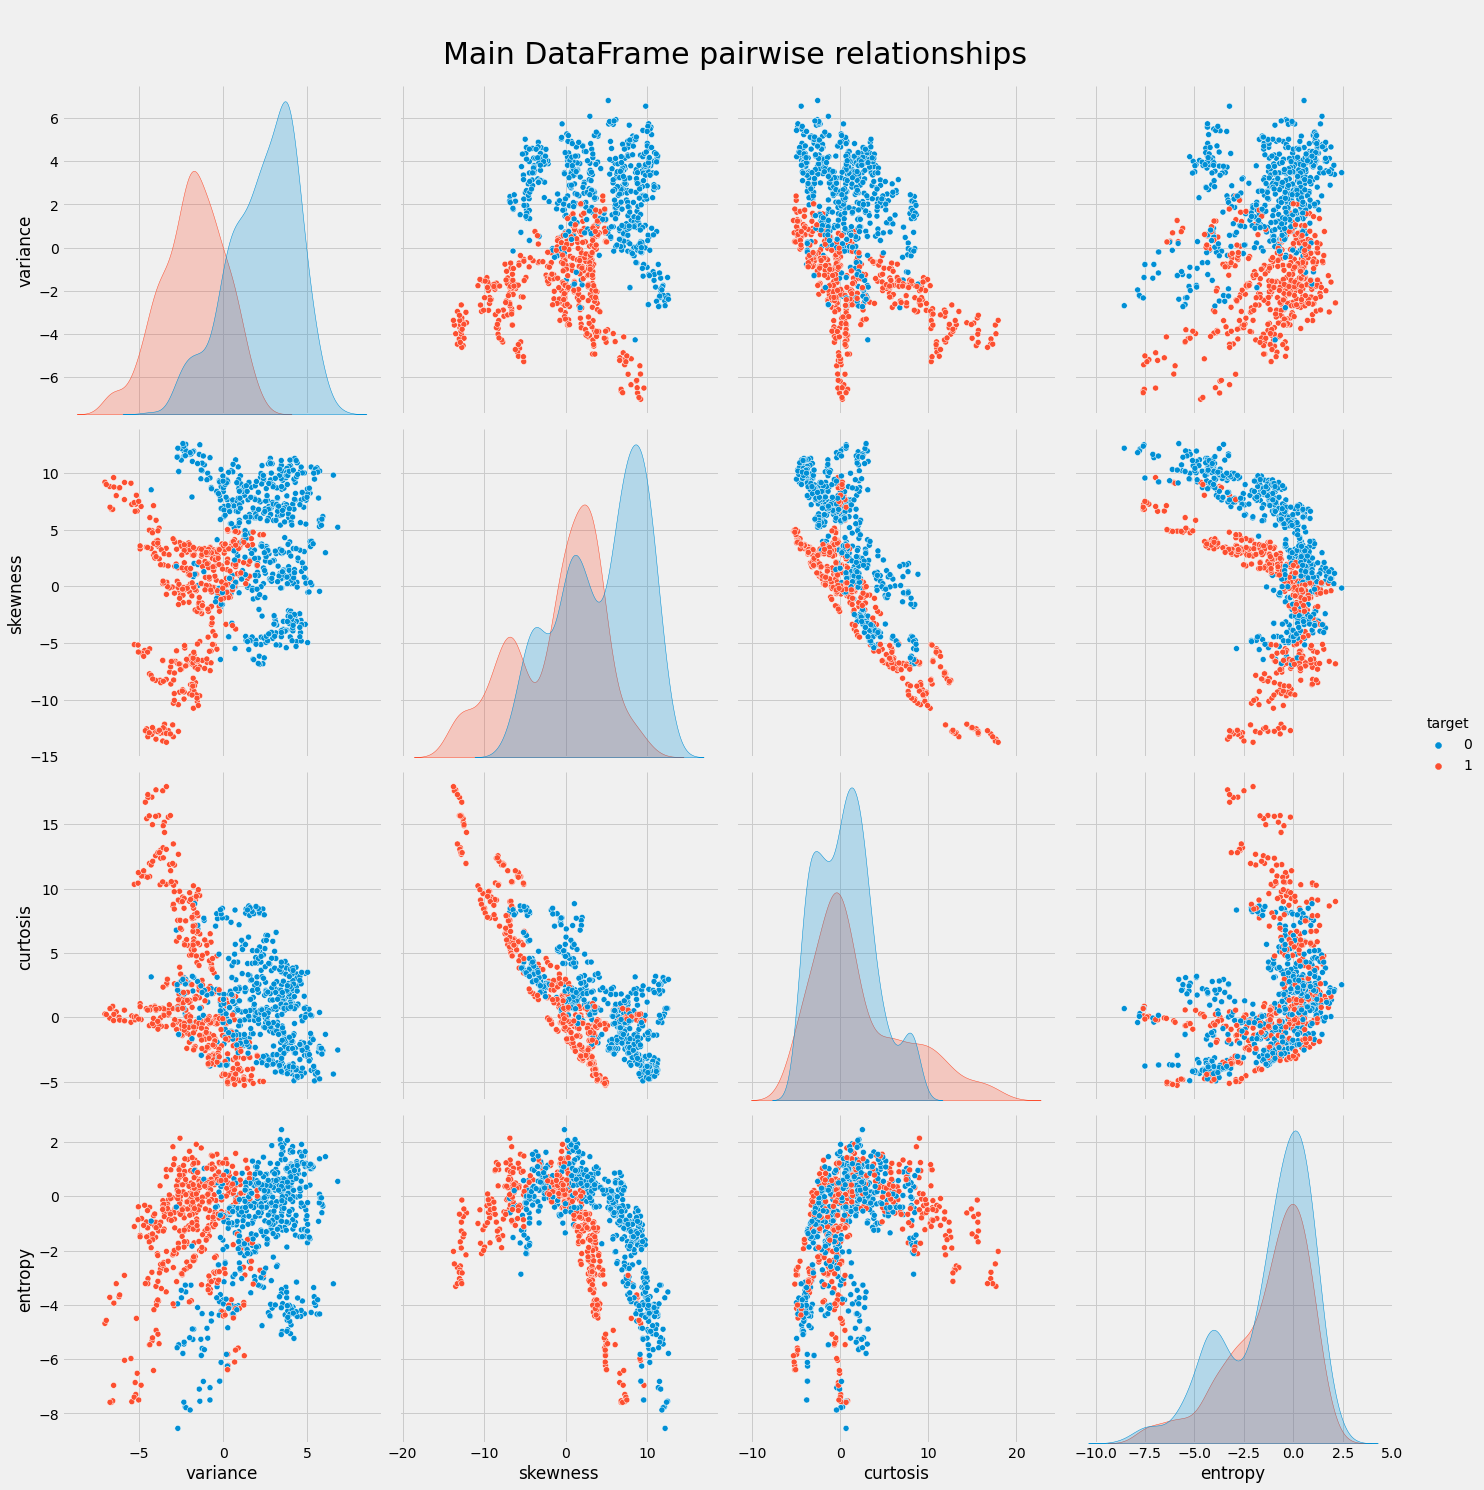

In [3]:
import seaborn as sns

plt.style.use('fivethirtyeight')
smp_val = 1000

# helper function for plotting a pairplot
def plotPair(df, target, title):
    g = sns.pairplot(df.sample(smp_val, random_state=42), height=5, diag_kind='kde', hue=target)
    g.fig.suptitle(f'\n{title}', fontsize=30, y=1.04)
    plt.show()
    
plotPair(df_raw, 'target', 'Main DataFrame pairwise relationships')

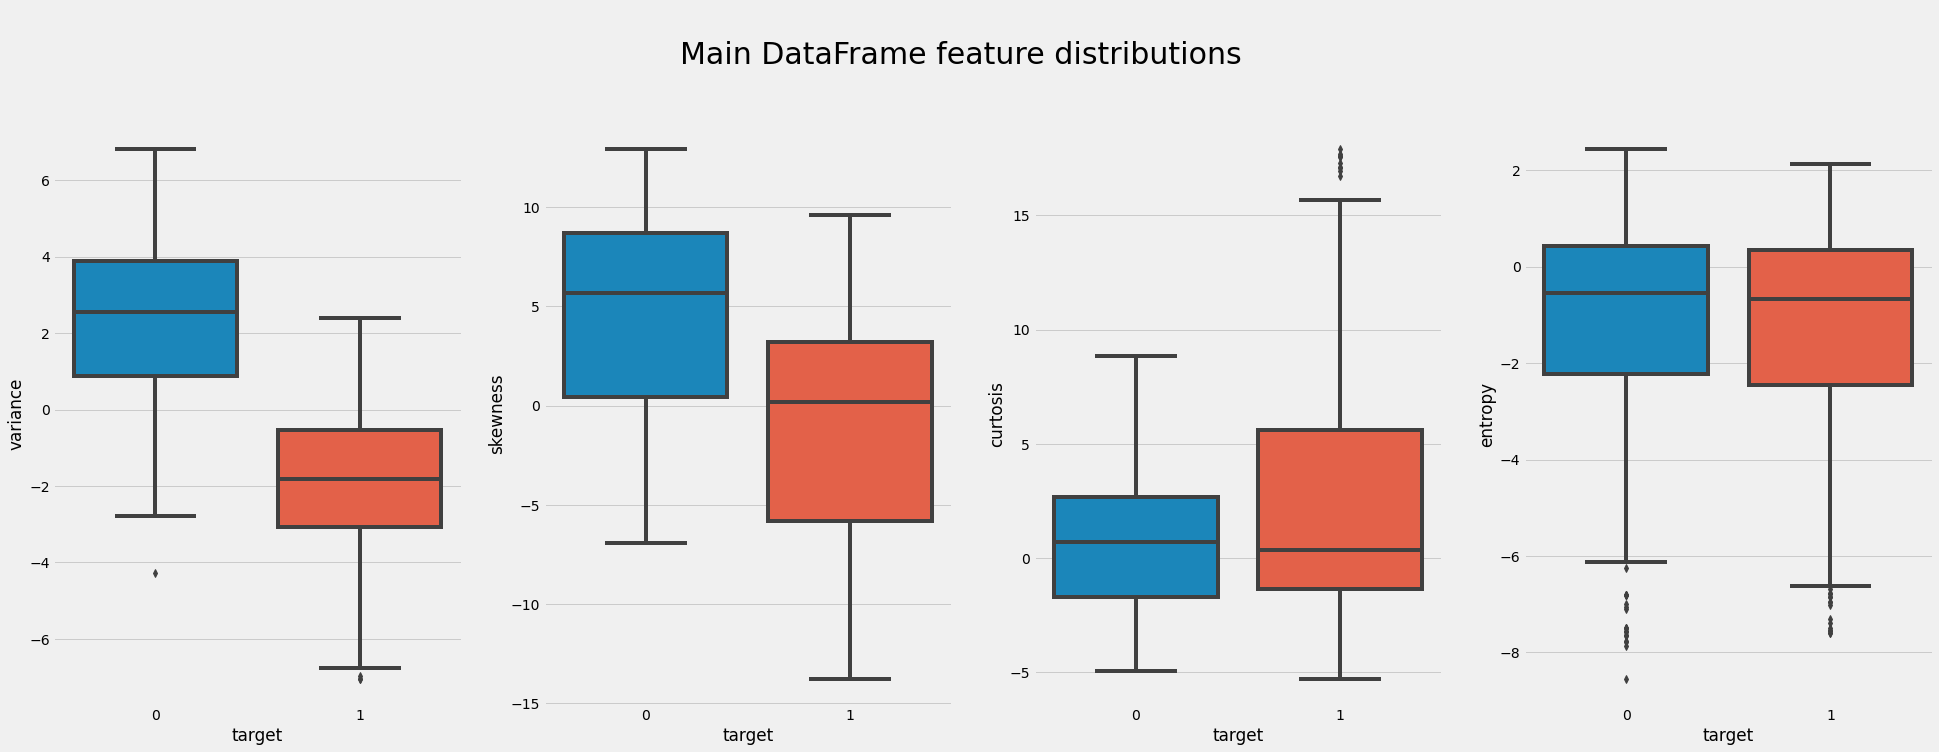

In [4]:
# helper function for plotting boxplots
def plotBox(df, target, title):
    X = df.drop([target], axis=1)
    y = df[target]

    X_len = len(X.columns)
    chk = X_len % 2
    row_val = 1
    
    if X_len > 5:
        col_val = X_len // 2
        row_val += 1
        if chk == 1:
            col_val += 1
    else:
        col_val = X_len

    fig, axes = plt.subplots(row_val, col_val, figsize=(30, 10))
    fig.suptitle(f'\n{title}', fontsize=30, y=1.04)

    # for indexing
    ctr = 0

    for i in range(row_val):
        for j in range(col_val):
            if row_val > 1:
                sns.boxplot(ax=axes[i,j], data=df, x=target, y=X.columns[ctr])
                if ctr + 1 != X_len:
                    ctr += 1
                else:
                    break;
            else:
                sns.boxplot(ax=axes[j], data=df, x=target, y=X.columns[ctr])
                ctr += 1
        
plotBox(df_raw, 'target', 'Main DataFrame feature distributions')

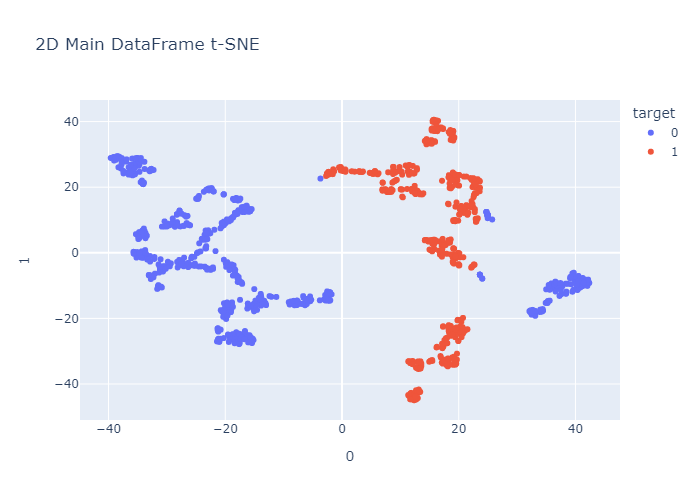


Done. Time elapsed: 21.78s


In [5]:
import time
import plotly.express as px
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from itertools import cycle

# helper function for plotting a 2D t-SNE graph
def plotTSNE(df, title, target=None, color=None):
    start_time = time.time()

    if target is None:
        test = df.sample(smp_val, random_state=42)
        features = test[X.columns]
    else:
        if color is None:
            test = df.sample(smp_val, random_state=42)
            temp = test.drop([target], axis=1)
        #     features = test[featGen(X)]
            features = test[temp.columns]
        else:
            test = df.sample(smp_val, random_state=42)
            features = test[X.columns]
    
    # Topic colors
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    
    # sets color to 'target' parameter if 'color' parameter wasn't provided
    if color is None:
        color = mycolors[test[target]]
        label = test[target]
    else:
        color = test[color]
        label = color

    tsne_model = TSNE(n_components=2, random_state=42)
    projections = tsne_model.fit_transform(features)

    fig = px.scatter(
        projections, x=0, y=1, 
        color=color,
        labels={'color': 'target'},
        title=f'2D {title} t-SNE'
    )

    labels = cycle(set(label))

    fig.for_each_trace(lambda t:  t.update(name = next(labels)))
    # fig.update_layout(width=1200, height=600)
    fig.show()

    print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))
    
plotTSNE(df_raw, 'Main DataFrame', 'target')

In [6]:
pos_y = sum(df_raw['target'][df_raw['target']==1])
neg_y = len(df_raw) - pos_y
print(f'\nNumber of positive samples: {pos_y} ({(pos_y / len(df_raw)) * 100:.2f}%)')
print(f'Number of unlabeled samples: {neg_y} ({(neg_y / len(df_raw)) * 100:.2f}%)\n')


Number of positive samples: 610 (44.46%)
Number of unlabeled samples: 762 (55.54%)



In [7]:
df_raw

,variance,skewness,curtosis,entropy,target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
y = df_raw['target'].values
y = pd.Series(y)

# Back up the true labels
y_orig = y.copy()

print(y_orig.value_counts())

# Unlabel 95% of positive samples
hidden_size = int(pos_y * 0.95)

y.loc[
    # use the 'choice' method to randomly select rows 
    np.random.choice(
        y[y==1].index,   # since 'y' is a series object, indexing is used to get the indexes of rows where 'y==1'
        replace=False,   # value of 'y[y==1].index' can't be selected multiple times
        size=hidden_size # output shape
    )
] = 0 # unlabel 'hidden_size' number of positive samples

0    762
1    610
dtype: int64


In [9]:
# Verify the new contents of the set
print(f'\nUnlabeled {hidden_size} positive samples')
print(f'{sum(y==1)} ({(sum(y==1) / len(y)) * 100:.2f}%) remaining positive samples out of {len(y)}\n')


Unlabeled 579 positive samples
31 (2.26%) remaining positive samples out of 1372



In [10]:
df_2 = pd.DataFrame()
df_2 = pd.concat([df_raw.drop(['target'], axis=1)])
df_2['target'] = y
df_2

,variance,skewness,curtosis,entropy,target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,0
1368,-1.38870,-4.87730,6.4774,0.34179,0
1369,-3.75030,-13.45860,17.5932,-2.77710,0
1370,-3.56370,-8.38270,12.3930,-1.28230,0


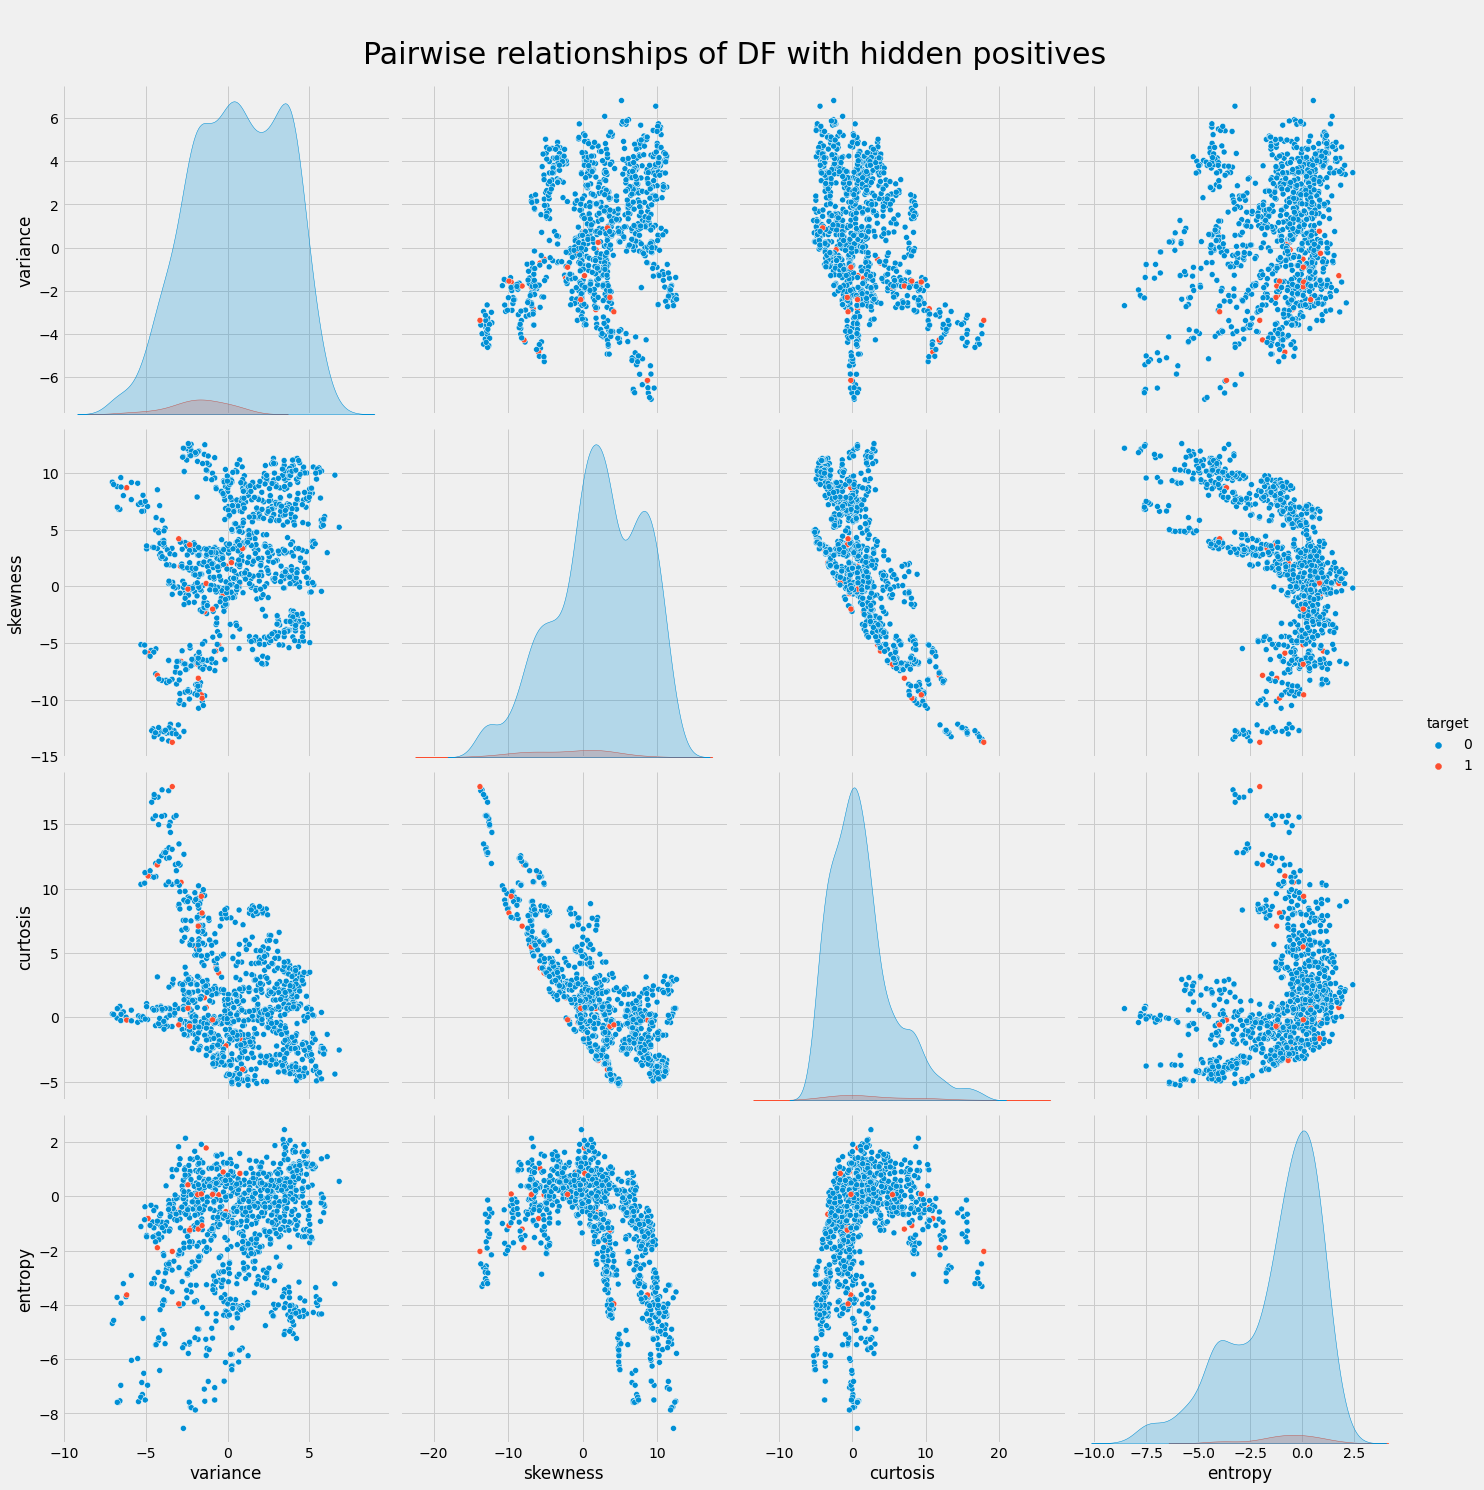

In [11]:
plotPair(df_2, 'target', 'Pairwise relationships of DF with hidden positives')

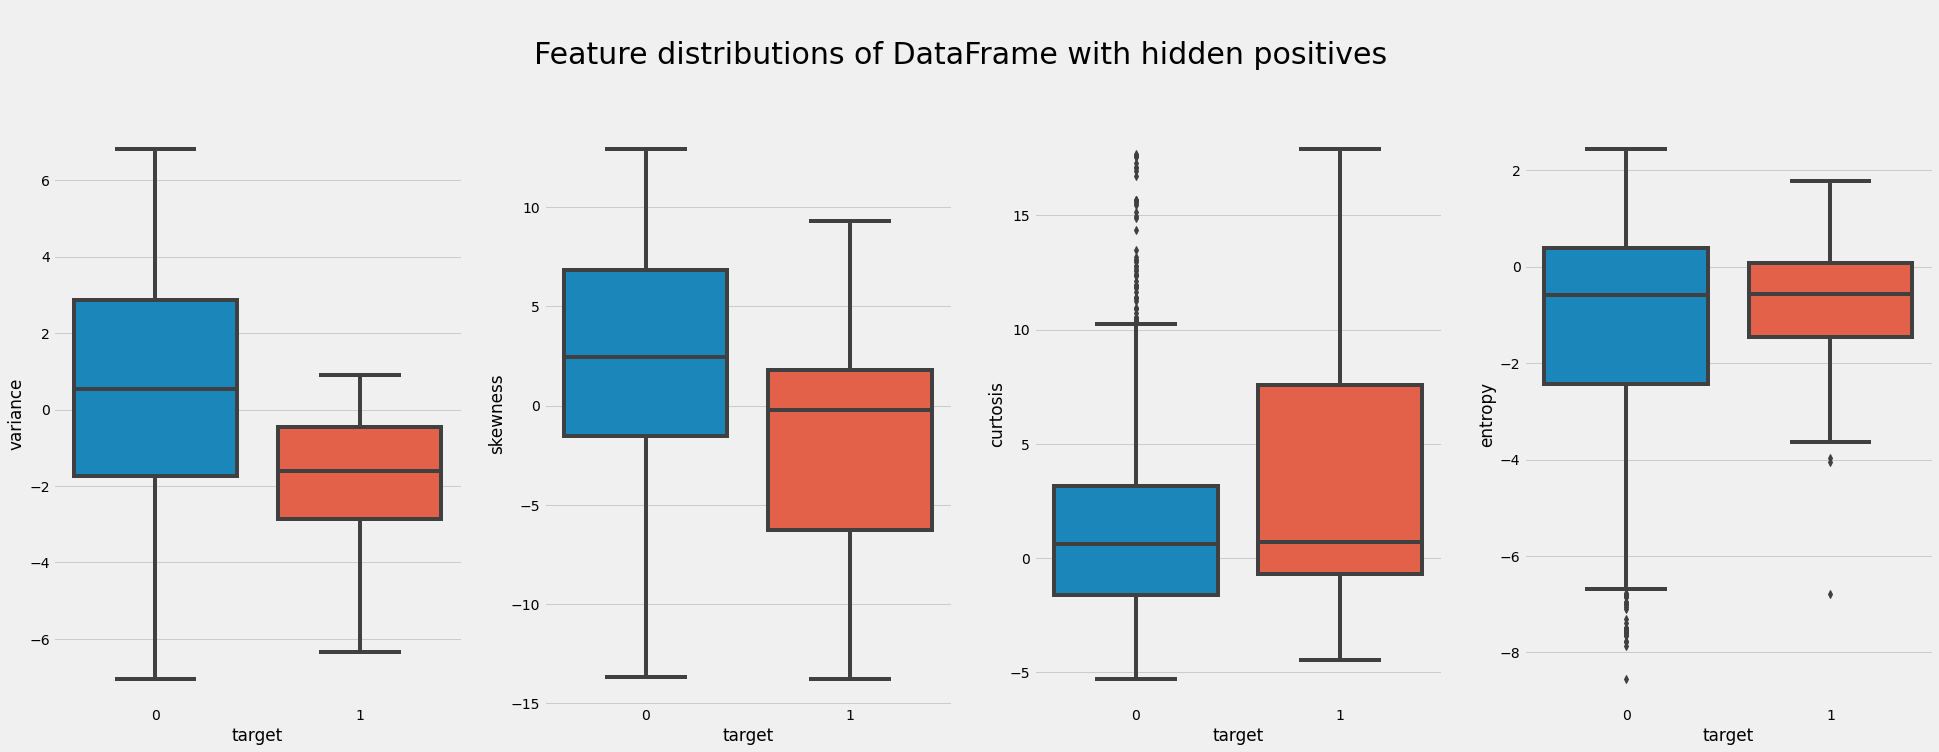

In [12]:
plotBox(df_2, 'target', 'Feature distributions of DataFrame with hidden positives')

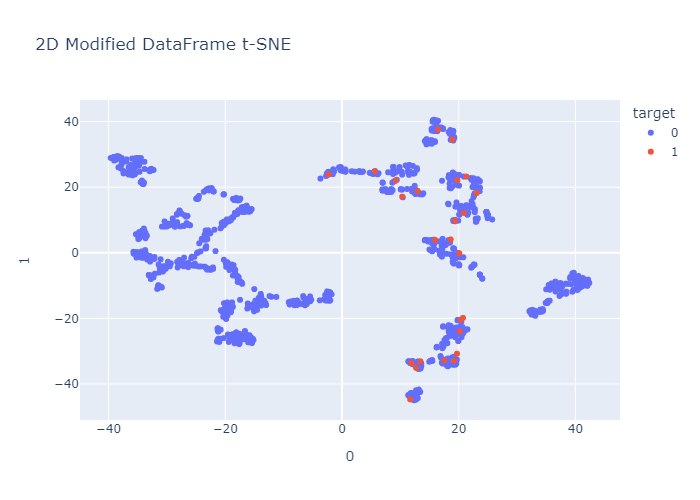


Done. Time elapsed: 4.49s


In [13]:
plotTSNE(df_2, 'Modified DataFrame', 'target')

## Standard classifier

In [14]:
# We'll use a generic random forest
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
target = 'target'

# store features in 'X' and training labels in 'y'
X = df_raw.drop([target], axis=1)

rf = RandomForestClassifier(
    n_estimators = 1000,  # Use 1000 trees
    n_jobs = -1,          # Use all CPU cores
    random_state = 42
)
rf.fit(X, y)

results = pd.DataFrame()
results = pd.concat([X])
results['truth'] = y_orig                         # true labels
results['label'] = y                              # labels with hidden positives
results['preds_std'] = rf.predict_proba(X)[:,1]   # The random forest's scores

print('\nDone. Time elapsed: {:.2f}s\n'.format(time.time() - start_time))
results


Done. Time elapsed: 1.47s



,variance,skewness,curtosis,entropy,truth,label,preds_std
0,3.62160,8.66610,-2.8073,-0.44699,0,0,0.001
1,4.54590,8.16740,-2.4586,-1.46210,0,0,0.000
2,3.86600,-2.63830,1.9242,0.10645,0,0,0.000
3,3.45660,9.52280,-4.0112,-3.59440,0,0,0.000
4,0.32924,-4.45520,4.5718,-0.98880,0,0,0.000
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0,0.024
1368,-1.38870,-4.87730,6.4774,0.34179,1,0,0.001
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0,0.004
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0,0.002


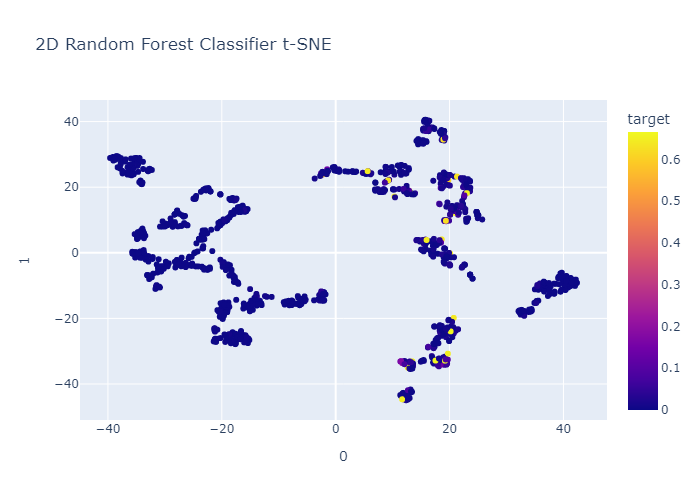


Done. Time elapsed: 4.40s


In [15]:
plotTSNE(results, 'Random Forest Classifier', 'truth', 'preds_std')

### Using `ElkanotoPuClassifier`

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from pulearn import ElkanotoPuClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC

start_time = time.time()

# init estimator
estimator = SVC(
#     kernel='linear' # defaults to 'rbf' kernel
    probability=True,
    cache_size=1000,
    random_state=42
)

ec = ElkanotoPuClassifier(
    estimator,
    hold_out_ratio=0.2
)

# inputs to the fit function have to be Numpy-vectorized
ec.fit(X.values, y.values)
# ec.fit(X, y)

print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))


Done. Time elapsed: 0.07s


### Extract only the 2nd column to get the predicted class probabilities on whether or not the input sample is positive

In [17]:
results['preds_ec'] = ec.predict_proba(X.values)

In [18]:
results

,variance,skewness,curtosis,entropy,truth,label,preds_std,preds_ec
0,3.62160,8.66610,-2.8073,-0.44699,0,0,0.001,0.651022
1,4.54590,8.16740,-2.4586,-1.46210,0,0,0.000,0.599336
2,3.86600,-2.63830,1.9242,0.10645,0,0,0.000,0.958594
3,3.45660,9.52280,-4.0112,-3.59440,0,0,0.000,0.686970
4,0.32924,-4.45520,4.5718,-0.98880,0,0,0.000,1.034444
...,...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0,0.024,1.062488
1368,-1.38870,-4.87730,6.4774,0.34179,1,0,0.001,0.838546
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0,0.004,0.779047
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0,0.002,0.939012


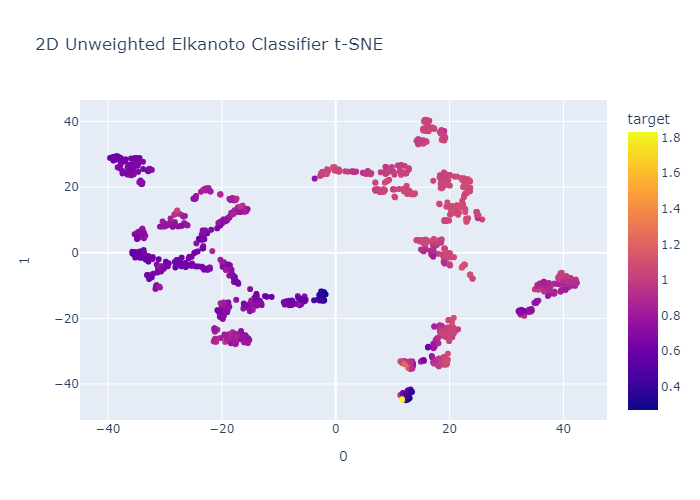


Done. Time elapsed: 4.52s


In [19]:
plotTSNE(results, 'Unweighted Elkanoto Classifier', 'truth', 'preds_ec')

### Using `BaggingPuClassifier`

In [20]:
from pulearn import BaggingPuClassifier

start_time = time.time()

bc = BaggingPuClassifier(
    n_estimators = 1000,  # 1000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,          # Use all cores
    random_state = 42
)
bc.fit(X, y)

print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))


Done. Time elapsed: 17.63s


### Extract only the 2nd column to get the predicted class probabilities on whether or not the input sample is unlabeled

In [21]:
results['preds_bag'] = bc.oob_decision_function_[:,1]

In [22]:
results['preds_bag'] = results['preds_bag'].fillna(0).sort_values()

In [23]:
results

,variance,skewness,curtosis,entropy,truth,label,preds_std,preds_ec,preds_bag
0,3.62160,8.66610,-2.8073,-0.44699,0,0,0.001,0.651022,0.002043
1,4.54590,8.16740,-2.4586,-1.46210,0,0,0.000,0.599336,0.002055
2,3.86600,-2.63830,1.9242,0.10645,0,0,0.000,0.958594,0.013333
3,3.45660,9.52280,-4.0112,-3.59440,0,0,0.000,0.686970,0.040775
4,0.32924,-4.45520,4.5718,-0.98880,0,0,0.000,1.034444,0.578571
...,...,...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,0,0.024,1.062488,0.869476
1368,-1.38870,-4.87730,6.4774,0.34179,1,0,0.001,0.838546,0.631417
1369,-3.75030,-13.45860,17.5932,-2.77710,1,0,0.004,0.779047,0.658811
1370,-3.56370,-8.38270,12.3930,-1.28230,1,0,0.002,0.939012,0.822449


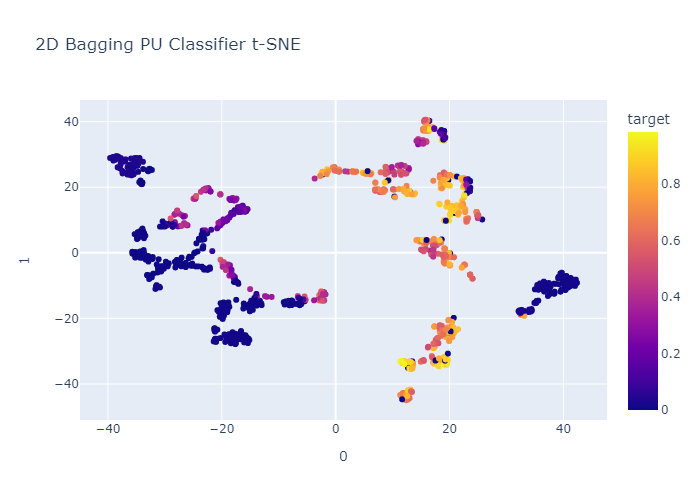


Done. Time elapsed: 4.80s


In [24]:
plotTSNE(results, 'Bagging PU Classifier', 'truth', 'preds_bag')

In [25]:
results.loc[(results['truth']==1) & (results['label']==0)]

,variance,skewness,curtosis,entropy,truth,label,preds_std,preds_ec,preds_bag
762,-1.39710,3.31910,-1.392700,-1.99480,1,0,0.002,1.017249,0.554985
763,0.39012,-0.14279,-0.031994,0.35084,1,0,0.007,1.072310,0.746436
764,-1.66770,-7.15350,7.892900,0.96765,1,0,0.000,0.819005,0.597536
765,-3.84830,-12.80470,15.682400,-1.28100,1,0,0.000,0.614152,0.754620
766,-3.56810,-8.21300,10.083000,0.96765,1,0,0.000,0.717300,0.525077
...,...,...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949,1,0,0.024,1.062488,0.869476
1368,-1.38870,-4.87730,6.477400,0.34179,1,0,0.001,0.838546,0.631417
1369,-3.75030,-13.45860,17.593200,-2.77710,1,0,0.004,0.779047,0.658811
1370,-3.56370,-8.38270,12.393000,-1.28230,1,0,0.002,0.939012,0.822449


## Model evaluation
---


Best Threshold-1=0.002000, G-Mean-1=0.773
Best Threshold-2=0.899401, G-Mean-2=0.885
Best Threshold=3=0.432958, G-Mean-3=0.838



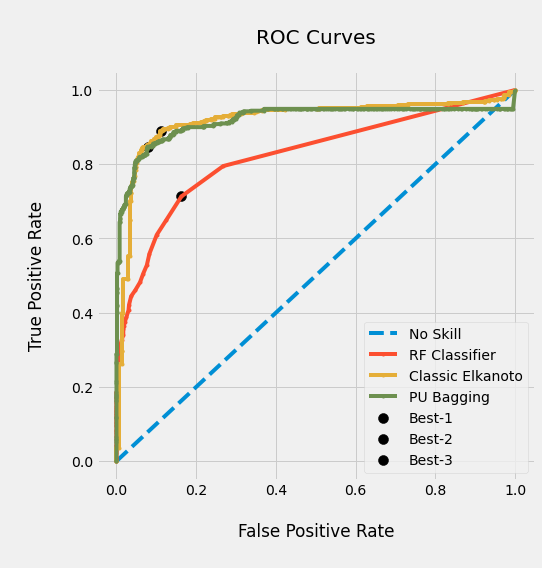

In [26]:
from sklearn.metrics import roc_curve
from numpy import sqrt, argmax

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_orig, results['preds_std'])
fpr2, tpr2, thresholds2 = roc_curve(y_orig, results['preds_ec'])
fpr3, tpr3, thresholds3 = roc_curve(y_orig, results['preds_bag'])

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
gmeans2 = sqrt(tpr2 * (1-fpr2))
gmeans3 = sqrt(tpr3 * (1-fpr3))

# locate the index of the largest g-mean
ix = argmax(gmeans)
ix2 = argmax(gmeans2)
ix3 = argmax(gmeans3)

print('\nBest Threshold-1=%f, G-Mean-1=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best Threshold-2=%f, G-Mean-2=%.3f' % (thresholds2[ix2], gmeans2[ix]))
print('Best Threshold=3=%f, G-Mean-3=%.3f\n' % (thresholds3[ix3], gmeans3[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RF Classifier')
plt.plot(fpr2, tpr2, marker='.', label='Classic Elkanoto')
plt.plot(fpr3, tpr3, marker='.', label='PU Bagging')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=100, label='Best-1')
plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', s=100, label='Best-2')
plt.scatter(fpr3[ix3], tpr3[ix3], marker='o', color='black', s=100, label='Best-3')

# axis labels
plt.xlabel('\nFalse Positive Rate\n')
plt.ylabel('\nTrue Positive Rate\n')
plt.legend()

# show the plot
plt.title('\nROC Curves\n', fontsize=20)
plt.grid(True)
plt.show()

## Comparison of approaches

In [27]:
# For each data point, calculate the average score from the three approaches
results['preds_mean'] = results[[
    'preds_std',  
    'preds_ec',
    'preds_bag'
]].mean(axis = 1)

In [28]:
results[results.label == 0].sort_values(
    'preds_std', ascending = False
).head()

,variance,skewness,curtosis,entropy,truth,label,preds_std,preds_ec,preds_bag,preds_mean
1182,-5.0477,-5.8023,11.244000,-0.39010,1,0,0.199,1.031639,0.892308,0.707649
1243,-5.0676,-5.1877,10.426600,-0.86725,1,0,0.174,1.043800,0.969388,0.729063
1304,-5.2943,-5.1463,10.333200,-1.11810,1,0,0.149,1.125259,0.976337,0.750199
806,-6.2003,8.6806,0.009134,-3.70300,1,0,0.146,1.054175,0.984725,0.728300
901,-1.5449,-10.1498,9.615200,-1.23320,1,0,0.140,1.049464,0.977551,0.722338


In [29]:
results[results.label == 0].sort_values(
    'preds_std', ascending = True
).head()

,variance,skewness,curtosis,entropy,truth,label,preds_std,preds_ec,preds_bag,preds_mean
670,3.4820,-4.1634,3.5008,-0.078462,0,0,0.0,0.923481,0.012308,0.311930
952,-1.2846,3.2715,-1.7671,-3.260800,1,0,0.0,0.997693,0.353484,0.450392
476,0.3798,0.7098,0.7572,-0.444400,0,0,0.0,1.034581,0.664622,0.566401
477,3.4893,6.6900,-1.2042,-0.387510,0,0,0.0,0.620965,0.002033,0.207666
948,-3.4917,-12.1736,14.3689,-0.616390,1,0,0.0,0.590955,0.668041,0.419665


In [30]:
results[results.label == 0].sort_values(
    'preds_bag', ascending = False
).head(100).truth.mean()

1.0

In [31]:
results[results.label == 0].sort_values(
    'preds_bag', ascending = True
).head(100).truth.mean()

0.0

In [34]:
# Prepare for graphing the performance 
# (i.e. the success in identifying hidden positives)
start = 10
ts = range(start, hidden_size, 1)
y_std, y_bag, y_ec, y_stp, y_all = [], [], [], [], []

'''
Get the mean of the sorted truth column values from 
the results column that have label column values of '0'
every 100 samples.

The results DF is sorted using the prediction probabilities 
of each approach in descending order to start with the truth 
values that were identified to be the most likely to be 
positive by each approach. 

In essence, the following code segment acquires the percentage of 
hidden positives that were correctly identified per approach.
'''
start_time = time.time()

for t in ts:
    y_std.append(
        results[results.label == 0].sort_values(
            'preds_std', ascending = False
        ).head(t).truth.mean()
    )
    y_ec.append(
        results[results.label == 0].sort_values(
            'preds_ec', ascending = False
        ).head(t).truth.mean()
    )
    y_bag.append(
        results[results.label == 0].sort_values(
            'preds_bag', ascending = False
        ).head(t).truth.mean()
    )
    y_all.append(
        results[results.label == 0].sort_values(
            'preds_mean', ascending = False
        ).head(t).truth.mean()
    )
    
print('\nDone. Time elapsed: {:.2f}s\n'.format(time.time() - start_time))


Done. Time elapsed: 2.40s



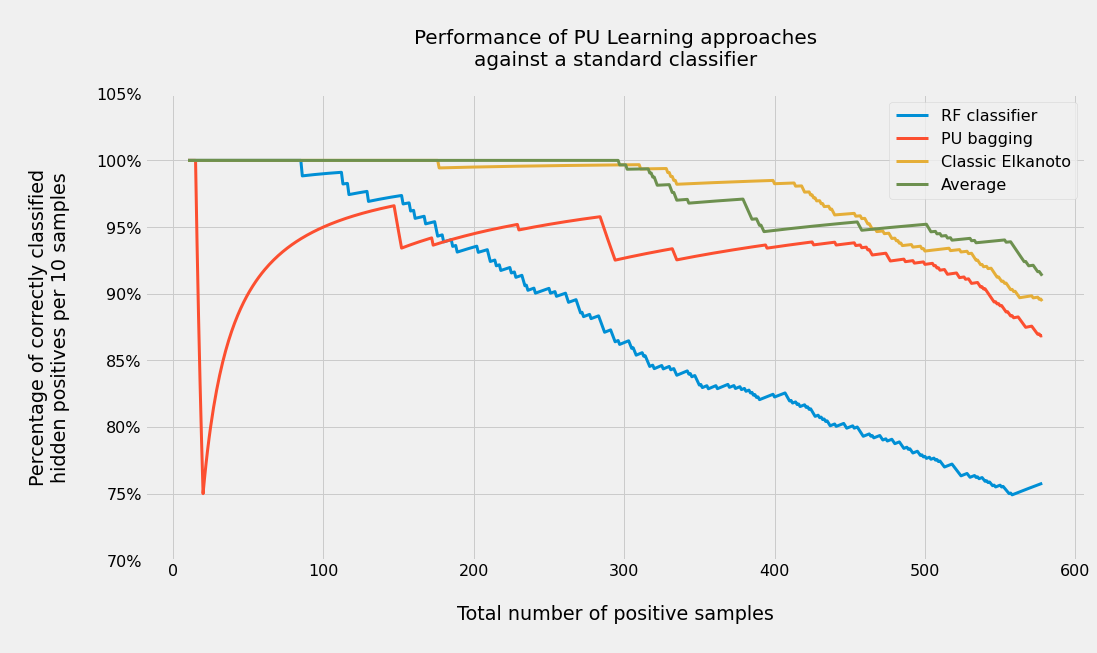

In [35]:
# Performance graphing
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8

plt.plot(
    ts, y_std,
    ts, y_ec,
    ts, y_bag,
    ts, y_all,
    lw = 3
)

vals = plt.gca().get_yticks()
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals])
# plt.xticks(np.arange(0, max(ts)+1, 5000))
plt.xlabel('\nTotal number of positive samples\n')
plt.ylabel(f'\nPercentage of correctly classified\nhidden positives per {start} samples\n')
plt.legend([
    'RF classifier', 
    'PU bagging', 
    'Classic Elkanoto', 
    'Average'
])
ylim = plt.gca().get_ylim()
plt.title('\nPerformance of PU Learning approaches\nagainst a standard classifier\n', fontsize=20)
plt.grid(True)
plt.show()